In [1]:
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn import decomposition, ensemble

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import RFE, RFECV
from sklearn import feature_selection

from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, make_scorer

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate


import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

import Feature_Extraction as fe

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ga75xoh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# load the dataset_RTE

root = ET.parse('data/RTE1_dev1_3ways.xml').getroot()
r1 = []
r2 = []
y = []
for el in list(root):
    label = el.get('entailment')
    if label == 'YES':
        y.append(1)
    elif label == 'NO':
        y.append(1)
    else:
        y.append(-1)
    r1.append(list(el)[0].text)
    r2.append(list(el)[1].text)
    
root = ET.parse('data/RTE1_dev2_3ways.xml').getroot()
for el in list(root):
    label = el.get('entailment')
    if label == 'YES':
        y.append(1)
    elif label == 'NO':
        y.append(1)
    else:
        y.append(-1)
    r1.append(list(el)[0].text)
    r2.append(list(el)[1].text)
    
r1t = []
r2t = []
yt = []
root = ET.parse('data/RTE1_test_3ways.xml').getroot()
for el in list(root):
    label = el.get('entailment')
    if label == 'YES':
        yt.append(1)
    elif label == 'NO':
        yt.append(1)
    else:
        y.append(-1)
    r1t.append(list(el)[0].text)
    r2t.append(list(el)[1].text)
    
ra1 = r1 + r1t
ra2 = r2 + r2t
ya = y + yt

In [4]:
# load the dataset AquaLush

data = open('data/five_hundred_rels.CSV', encoding="ANSI").read()
label, r_aq1, r_aq2, rmix_aq = [], [], [], []
for i, line in enumerate(data.split("\n")):
    if line != '' and line.isspace() != True:
        content = line.split(';')
        label.append(content[0])
        r_aq1.append(content[1])
        r_aq2.append(content[2])
        rmix_aq.append(content[1]+content[2])

y_aq = []
for l in label:
    if l == 'true':
        y_aq.append(1)
    else:
        y_aq.append(-1)

In [ ]:
x = []
for i in range(len(ra1)):
    x.append(fe.createFBag(ra1[i], ra2[i]))
    
vec = DictVectorizer()
xx = vec.fit_transform(x).toarray()

Optimal number of features : 1


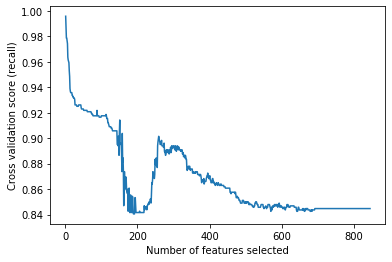

In [6]:
#feature evaluation based on recall
clf = SVC(kernel='linear', C=1)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10),scoring='recall')
rfecv.fit(xx, ya)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (recall)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Optimal number of features : 5


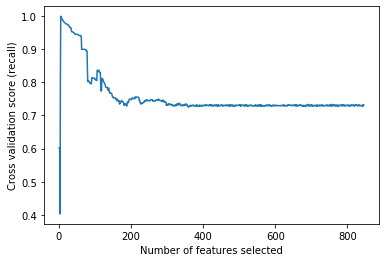

In [9]:
#feature evaluation based on precision and LR
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=4.281332398719396, class_weight='balanced', penalty= 'l1', solver= 'liblinear')
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),scoring='recall')
rfecv.fit(xx, ya)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (recall)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Optimal number of features : 218


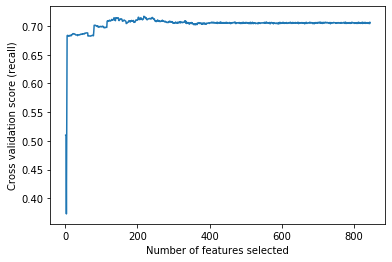

In [8]:
#feature evaluation based on precision and LR
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=4.281332398719396, class_weight='balanced', penalty= 'l1', solver= 'liblinear')
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),scoring='precision')
rfecv.fit(xx, ya)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (recall)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ga75xoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Optimal number of features : 5


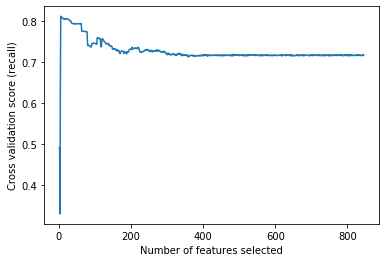

In [10]:
#feature evaluation based on precision and LR
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=4.281332398719396, class_weight='balanced', penalty= 'l1', solver= 'liblinear')
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),scoring='f1')
rfecv.fit(xx, ya)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (recall)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [11]:
x_NoOVLAP = []
x_NoSUBJOBJ = []
x_NoModal = []
#fe.createFBag(ra1[i], ra2[i])
for index in range(len(ra1)):
    x_NoOVLAP.append(fe.createFBagNoOVLAP(ra1[index], ra2[index]))
    x_NoSUBJOBJ.append(fe.createFBagNoSUBJOBJ(ra1[index], ra2[index]))
    x_NoModal.append(fe.createFBagNoModal(ra1[index], ra2[index]))
    index = index + 1
    
vec = DictVectorizer()
xx_NoOVLAP = vec.fit_transform(x_NoOVLAP).toarray()
xx_NoSUBJOBJ = vec.fit_transform(x_NoSUBJOBJ).toarray()
xx_NoModal = vec.fit_transform(x_NoModal).toarray()

In [12]:
print('Shape of Feature Sets:')
print('All Features --> ', xx.shape)
print('No Overlap Features --> ', xx_NoOVLAP.shape)
print('No Subject-object Features --> ', xx_NoSUBJOBJ.shape)
print('No Modal and Root Features --> ', xx_NoModal.shape)

Shape of Feature Sets:
All Features -->  (1367, 845)
No Overlap Features -->  (1367, 837)
No Subject-object Features -->  (1367, 837)
No Modal and Root Features -->  (1367, 16)


In [13]:
print('Example of a feature set BEFORE vectorizing:')
print(x[0])
print()
print('Example of a feature set AFTER vectorizing:')
print(xx[0])

Example of a feature set BEFORE vectorizing:
{'subjsubj': 0.5, 'subjobj': 0.5, 'objsubj': 0.5, 'objobj': 1, 'asubjsubj': 0, 'asubjobj': 0, 'aobjsubj': 0, 'aobjobj': 0, 'noun_ovlap_1_2': 0.5, 'noun_ovlap_2_1': 0.5, 'verb_ovlap_1_2': 0, 'verb_ovlap_2_1': 0, 'M_1': 'unknown', 'root_1': 'trade', 'M_2': 'unknown', 'root_2': 'rise'}

Example of a feature set AFTER vectorizing:
[0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.
 0.  0.  0.  0.  0.5 0.  0.5 0.  1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [15]:
all_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
NoOVLAP_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
NoSUBJOBJ_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}
NoModal_scores = {'precision':np.array([]), 'recall':np.array([]), 'f1':np.array([])}

num_of_trials = 10
kfold = 5
clf = SVC(kernel='linear', C=1)
myscores = ['precision', 'recall', 'f1']

for i in range(num_of_trials):
    skf = StratifiedShuffleSplit(n_splits=kfold)
    
    nested_score_all = cross_validate(clf, X=xx, y=ya, cv=skf, scoring=myscores)
    nested_score_NoOVLAP = cross_validate(clf, X=xx_NoOVLAP, y=ya, cv=skf, scoring=myscores)
    nested_score_NoSUBJOBJ = cross_validate(clf, X=xx_NoSUBJOBJ, y=ya, cv=skf, scoring=myscores)
    nested_score_NoModal = cross_validate(clf, X=xx_NoModal, y=ya, cv=skf, scoring=myscores)
    
    for scr in myscores:
        all_scores[scr] = np.concatenate((all_scores[scr], nested_score_all['test_' + scr]), axis=None)
        NoOVLAP_scores[scr] = np.concatenate((NoOVLAP_scores[scr], nested_score_NoOVLAP['test_' + scr]), axis=None)
        NoSUBJOBJ_scores[scr] = np.concatenate((NoSUBJOBJ_scores[scr], nested_score_NoSUBJOBJ['test_' + scr]), axis=None)
        NoModal_scores[scr] = np.concatenate((NoModal_scores[scr], nested_score_NoModal['test_' + scr]), axis=None)

        
        
df = pd.DataFrame({'all_precision':all_scores['precision'], 'all_recall':all_scores['recall'], 'all_f1':all_scores['f1'],
                  'NoOVLAP_precision':NoOVLAP_scores['precision'], 'NoOVLAP_recall':NoOVLAP_scores['recall'], 'NoOVLAP_f1':NoOVLAP_scores['f1'],
                   'NoSUBJOBJ_precision':NoSUBJOBJ_scores['precision'], 'NoSUBJOBJ_recall':NoSUBJOBJ_scores['recall'], 'NoSUBJOBJ_f1':NoSUBJOBJ_scores['f1'],
                   'NoModal_precision':NoModal_scores['precision'], 'NoModal_recall':NoModal_scores['recall'], 'NoModal_f1':NoModal_scores['f1']})

Feature Set Evaluation for SVC



------------------------

DescribeResult(nobs=50, minmax=(0.6635514018691588, 0.7619047619047619), mean=0.7161001835643513, variance=0.0005407863870324235, skewness=-0.136216895385153, kurtosis=-0.3599614347146689)
DescribeResult(nobs=50, minmax=(0.6697247706422018, 0.7572815533980582), mean=0.7151962252223406, variance=0.0003803512741532537, skewness=0.18728907880240117, kurtosis=-0.2224737953047624)
DescribeResult(nobs=50, minmax=(0.6724137931034483, 0.7669902912621359), mean=0.7227332674716135, variance=0.0004202850259984352, skewness=-0.11987158496514276, kurtosis=-0.3274857852477431)
DescribeResult(nobs=50, minmax=(0.6861313868613139, 0.6861313868613139), mean=0.6861313868613139, variance=0.0, skewness=0.0, kurtosis=-3.0)
------------------------

DescribeResult(nobs=50, minmax=(0.723404255319149, 0.9148936170212766), mean=0.8427659574468086, variance=0.0022186140187174914, skewness=-0.5813130728591568, kurtosis=-0.45978997570497393)
DescribeResul

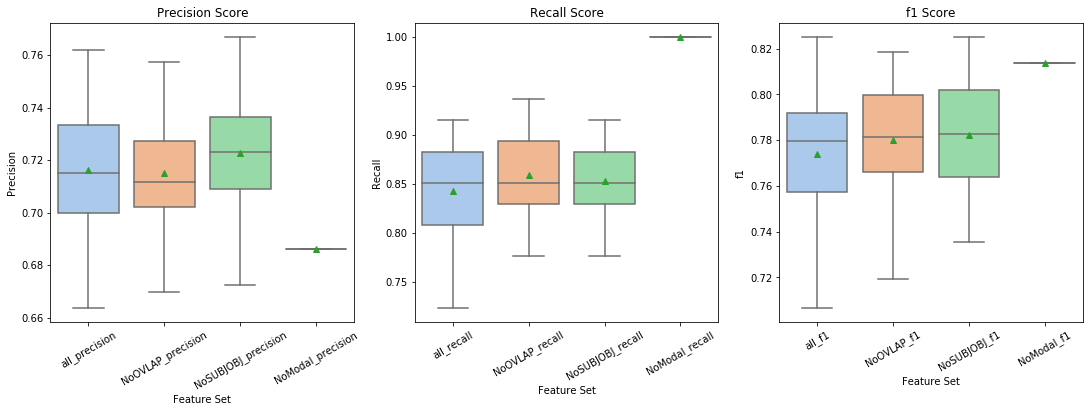

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18.5, 5.5)
print("Feature Set Evaluation for SVC")
print()
print()
print()

print("------------------------")
print()
precision_data = pd.melt(df[['all_precision', 'NoOVLAP_precision', 'NoSUBJOBJ_precision', 'NoModal_precision']])
axp = sns.boxplot(x="variable", y="value", data=precision_data, showmeans=True, palette="pastel", ax=ax1)
axp.set(xlabel='Feature Set', ylabel='Precision')
axp.set_xticklabels(axp.get_xticklabels(),rotation=30)
axp.set_title('Precision Score')
print(stats.describe(df['all_precision']))
print(stats.describe(df['NoOVLAP_precision']))
print(stats.describe(df['NoSUBJOBJ_precision']))
print(stats.describe(df['NoModal_precision']))
print("------------------------")
print()
recall_data = pd.melt(df[['all_recall', 'NoOVLAP_recall', 'NoSUBJOBJ_recall', 'NoModal_recall']])
axr = sns.boxplot(x="variable", y="value", data=recall_data, showmeans=True, palette="pastel", ax=ax2)
axr.set(xlabel='Feature Set', ylabel='Recall')
axr.set_xticklabels(axr.get_xticklabels(),rotation=30)
axr.set_title('Recall Score')
print(stats.describe(df['all_recall']))
print(stats.describe(df['NoOVLAP_recall']))
print(stats.describe(df['NoSUBJOBJ_recall']))
print(stats.describe(df['NoModal_recall']))
print("------------------------")
print()
f1_data = pd.melt(df[['all_f1', 'NoOVLAP_f1', 'NoSUBJOBJ_f1', 'NoModal_f1']])
axf = sns.boxplot(x="variable", y="value", data=f1_data, showmeans=True, palette="pastel", ax=ax3)
axf.set(xlabel='Feature Set', ylabel='f1')
axf.set_xticklabels(axf.get_xticklabels(),rotation=30)
axf.set_title('f1 Score')
print(stats.describe(df['all_f1']))
print(stats.describe(df['NoOVLAP_f1']))
print(stats.describe(df['NoSUBJOBJ_f1']))
print(stats.describe(df['NoModal_f1']))